In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, _) , (_, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = (X_train - 127.5)/127.5

print(X_train.min())
print(X_train.max())

-1.0
1.0


In [ ]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
HALF_BATCH = 128
NO_OF_BATCHES = int(X_train.shape[0]/BATCH_SIZE)
NOISE_DIM = 100 # Upsample this into 784
adam = Adam(lr = 2e-4, beta_1 = 0.5)

In [ ]:
# Generator Model : Upsampling
# 100 dim -> 784 dim

generator = Sequential()
generator.add(Dense(256, input_shape = (NOISE_DIM,)  ))
generator.add(LeakyReLU(0.2))
generator.add(Dense(500))
generator.add(LeakyReLU(0.2))
generator.add(Dense(800))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss="binary_crossentropy", optimizer = adam )
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               128500    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)               400800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)              

In [ ]:
# Discriminator Model -> (Downsampling)
# Input : 784 dim
# output : 1 neuron



discriminator = Sequential()
discriminator.add(Dense(256, input_shape = (784,) ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss="binary_crossentropy", optimizer = adam)
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Combined Model


discriminator.trainable = False



gan_input = Input(shape = (NOISE_DIM,) )

generated_img = generator(gan_input)

gan_output = discriminator(generated_img)

# Functional API
model = Model(inputs= gan_input, outputs= gan_output)
model.compile(loss="binary_crossentropy", optimizer = adam)

In [ ]:
# model.summary()

In [ ]:
X_train = X_train.reshape(-1, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
def display_images(samples = 25):
    noise = np.random.normal(0,1, size = (samples, NOISE_DIM))
    
    generated_img = generator.predict(noise)
    
    
    plt.figure(figsize=(10,10))
    
    for i in range(samples):
        plt.subplot(5,5,i+1)
        plt.imshow(generated_img[i].reshape(28,28),cmap='gray')
        plt.axis("off")
        
    plt.show()

Epoch 1 Disc loss 0.7195407883861126, Generator Loss 0.7871732418425381
Epoch 2 Disc loss 0.6996585578999968, Generator Loss 0.7690749438479543
Epoch 3 Disc loss 0.7018440848487055, Generator Loss 0.774471394252032
Epoch 4 Disc loss 0.6842301561791673, Generator Loss 0.7732047461904585
Epoch 5 Disc loss 0.6830069399797, Generator Loss 0.8393943547271192
Epoch 6 Disc loss 0.6656914865359281, Generator Loss 0.8609891994856298
Epoch 7 Disc loss 0.6522438282895292, Generator Loss 0.9226182519923896
Epoch 8 Disc loss 0.6412708385505228, Generator Loss 0.9219067238736898
Epoch 9 Disc loss 0.6512412970137392, Generator Loss 0.9375243671238422
Epoch 10 Disc loss 0.6269126153017721, Generator Loss 0.9897277194540948


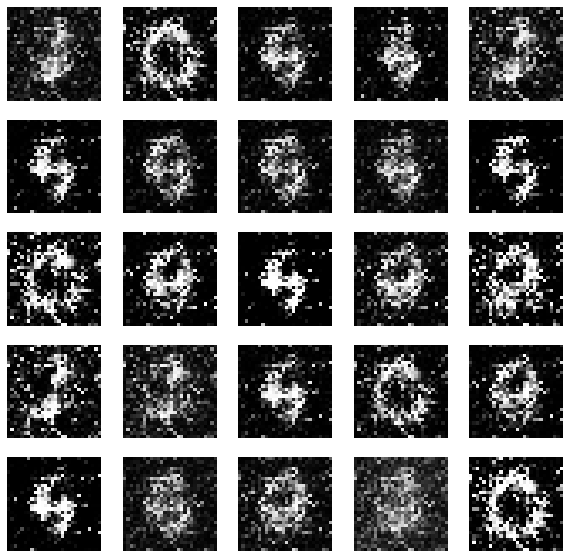

Epoch 11 Disc loss 0.6257642661022325, Generator Loss 0.9925948313903064
Epoch 12 Disc loss 0.6141788479354646, Generator Loss 1.047122476156801
Epoch 13 Disc loss 0.6109626230138999, Generator Loss 1.0285087176598608
Epoch 14 Disc loss 0.5983341257923689, Generator Loss 1.0756818000227213
Epoch 15 Disc loss 0.6132182063709977, Generator Loss 1.0272227863315493
Epoch 16 Disc loss 0.5957919464279444, Generator Loss 1.074363008607179
Epoch 17 Disc loss 0.6098541299629415, Generator Loss 1.0431692083366215
Epoch 18 Disc loss 0.6167425490342654, Generator Loss 1.0122921215370297
Epoch 19 Disc loss 0.643419854533978, Generator Loss 0.9460305580869317
Epoch 20 Disc loss 0.6556873228560146, Generator Loss 0.9101266304496676


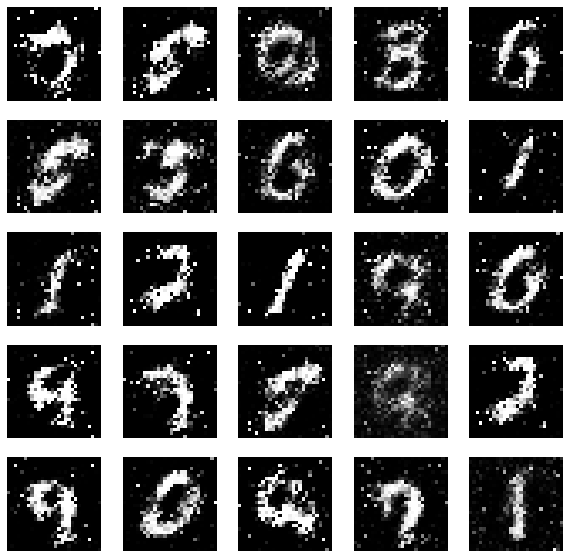

Epoch 21 Disc loss 0.6638058262248324, Generator Loss 0.8920394438318908
Epoch 22 Disc loss 0.638090623367546, Generator Loss 0.9420340058859438
Epoch 23 Disc loss 0.6648698008468008, Generator Loss 0.8760247630998492
Epoch 24 Disc loss 0.6714482832158732, Generator Loss 0.8589822489302605
Epoch 25 Disc loss 0.6652787930180883, Generator Loss 0.8635586232412606
Epoch 26 Disc loss 0.6658143955163467, Generator Loss 0.8677804048638791
Epoch 27 Disc loss 0.6687008193415455, Generator Loss 0.853999872226268
Epoch 28 Disc loss 0.6703280267807153, Generator Loss 0.8641733953263611
Epoch 29 Disc loss 0.6706450050457929, Generator Loss 0.8551043034531176
Epoch 30 Disc loss 0.6674617015653186, Generator Loss 0.862493657739833


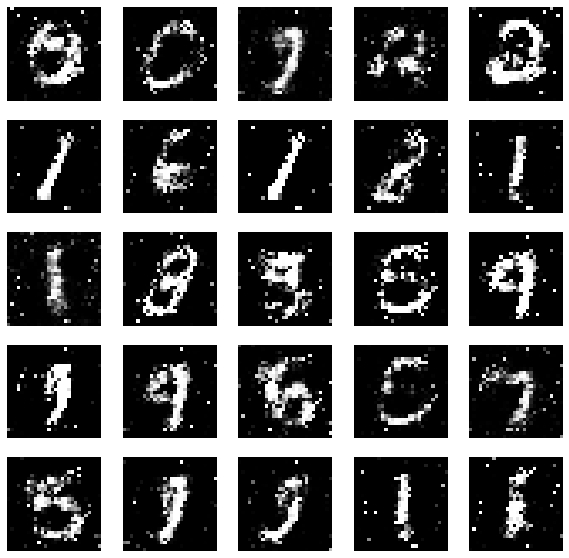

Epoch 31 Disc loss 0.6550315193131439, Generator Loss 0.8794622381683439
Epoch 32 Disc loss 0.6657888686809784, Generator Loss 0.8679981143213809
Epoch 33 Disc loss 0.6713195915660287, Generator Loss 0.8549226876348257
Epoch 34 Disc loss 0.6701418939563963, Generator Loss 0.8508558198809624
Epoch 35 Disc loss 0.6646131511427399, Generator Loss 0.8678270361851901
Epoch 36 Disc loss 0.6659978837029547, Generator Loss 0.8608493008650839
Epoch 37 Disc loss 0.6609808821708728, Generator Loss 0.8722287400159985
Epoch 38 Disc loss 0.6656321371212984, Generator Loss 0.870883691124618
Epoch 39 Disc loss 0.6667207382683061, Generator Loss 0.8687334386631846
Epoch 40 Disc loss 0.6709128280735424, Generator Loss 0.8538670598063618


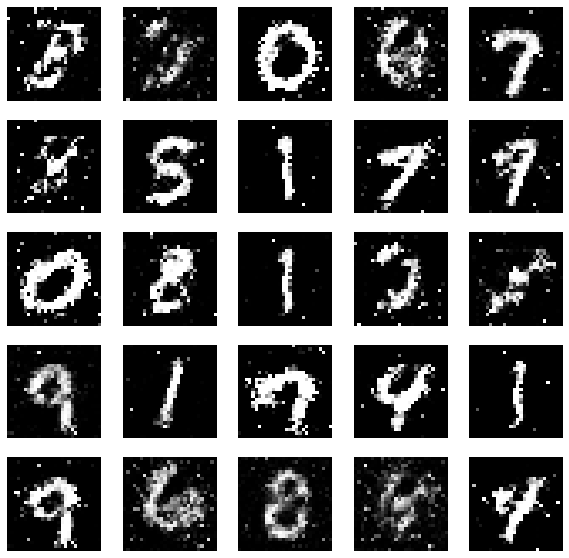

Epoch 41 Disc loss 0.6716803672731432, Generator Loss 0.8582054909784347
Epoch 42 Disc loss 0.6701147072335594, Generator Loss 0.8648094167001545
Epoch 43 Disc loss 0.6753722126157875, Generator Loss 0.842928210273385
Epoch 44 Disc loss 0.6726428277981586, Generator Loss 0.8441880021709949
Epoch 45 Disc loss 0.6718037797090335, Generator Loss 0.8518875134177506
Epoch 46 Disc loss 0.6751870826268808, Generator Loss 0.847349081421271
Epoch 47 Disc loss 0.672663231436004, Generator Loss 0.8560039130970836
Epoch 48 Disc loss 0.6739519285595316, Generator Loss 0.850795058067888
Epoch 49 Disc loss 0.6668254827332293, Generator Loss 0.8580611357465386
Epoch 50 Disc loss 0.6662010528847703, Generator Loss 0.8576256253290921


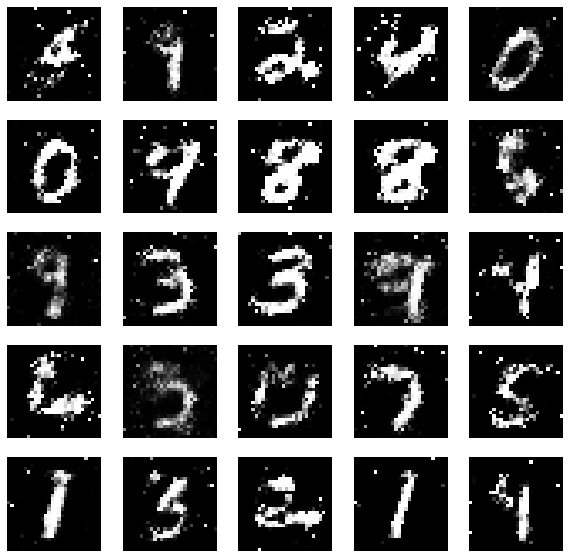

In [ ]:
# TRAINING LOOP

d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):

  epoch_d_loss = 0.0
  epoch_g_loss = 0.0


  # Mini batch gradient descent
  for step in range(NO_OF_BATCHES):

    # ===========================================================================
    # Training Step -1    [Train Discriminator]
    # discriminator.trainable = True

    # Get real data 
    idx = np.random.randint(0, 60000, HALF_BATCH)
    real_imgs = X_train[idx]

    # Get fake data
    noise = np.random.normal(0, 1, size= (HALF_BATCH, NOISE_DIM) )
    fake_imgs = generator.predict(noise)

    # Labels
    real_y = np.ones((HALF_BATCH, 1))*0.9 # one-sided label smoothing
    fake_y = np.zeros((HALF_BATCH, 1))

    # now, train D
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)

    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    # ===========================================================================


    # ===========================================================================
    # Step -2 Train  Generator (Discriminator freeze)
    
    discriminator.trainable = False

    noise = np.random.normal(0, 1, size= (BATCH_SIZE, NOISE_DIM) )
    ground_truth_y = np.ones((BATCH_SIZE, 1))

    g_loss= model.train_on_batch(noise, ground_truth_y)

    epoch_g_loss += g_loss
    # ===========================================================================


  print("Epoch {} Disc loss {}, Generator Loss {}".format((epoch+1), epoch_d_loss/NO_OF_BATCHES, epoch_g_loss/BATCH_SIZE))

  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if(epoch+1)%10==0:
    generator.save("model.h5")
    display_images()